Exploratory Data Analysis

# Exploratory Data Analysis


### STEP 1: Understanding the data  




In [ ]:
# Load the dataset from a CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# pd.set_option("max_columns",200) --- not needed for this dataset since we only have 7 columns

# Load the dataset
df = pd.read_csv("ACME-HappinessSurvey2020.csv")


print("\nDataframe Shape: ", df.shape)  # 126 rows , 7 columns
# Print out the first few rows of the dataframe
# Display the first few rows of the dataframe
print("\nDataframe HEAD: ", df.head())

# Get a summary of the dataframe
print("\nDataframe Summary: ", df.describe())

# List out all columns of the dataframe

print("\nDataframe Columns: ", df.columns)

print("\nDataframe Dtypes: ", df.dtypes)
# Check for missing values
print("\nMissing Values count: ", df.isnull().sum())



Dataframe Shape:  (126, 7)

Dataframe HEAD:     Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5

Dataframe Summary:                  Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std      0.499714    0.800000    1.114892    1.023440    0.875776    1.147641   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000   
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000   
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               X6  
count  12

# Step 2 : Data Preparation / Cleaning 
### (not required here since our data has no missing values and is all integers) 



# Step 3: Feature Understanding / Univariate Analysis

Understand distribution of features and find some potential outliers in the dataset

X1
5    65
4    40
3    20
1     1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

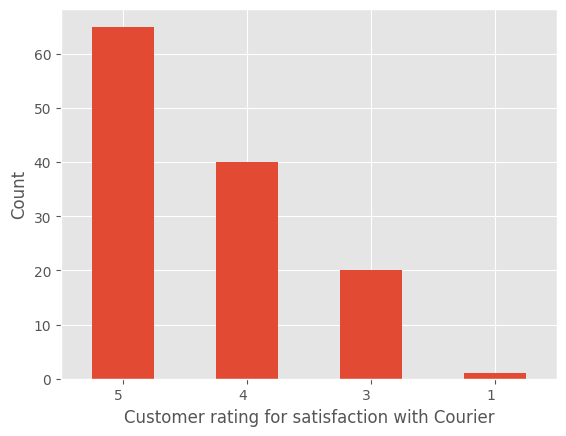

In [ ]:


'''
Univariate analysis is a statistical method that examines a single variable in a 
data set. It's a fundamental type of data analysis that's used to describe 
and summarize data. 

Single column in a database is a Series
'''
# values_counts counts how many unique values occured
# and orders them from most to least occuring value range


print(df["X1"].value_counts())


# Plotting the X1 value counts
df["X1"].value_counts().plot(kind='bar')


# Fix for horizontal x-axis labels
plt.xticks(rotation=0, ha="right")

plt.xlabel('Customer rating for satisfaction with Courier')

plt.ylabel('Count')

# Plot the distribution of each feature
# This is a good way to visualize the distribution of each feature
# df.hist(bins=15, figsize=(15, 10))
# plt.suptitle('Feature Distributions')
# plt.show()

# # Correlation matrix
# # This is a good way to visualize the correlation between features
# corr = df.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# # Boxplot for each feature
# # This is a good way to visualize the distribution of each feature
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=df)
# plt.title('Boxplot of Features')
# plt.xticks(rotation=90)
# plt.show()


# Get Distribution of Column Using Histogram

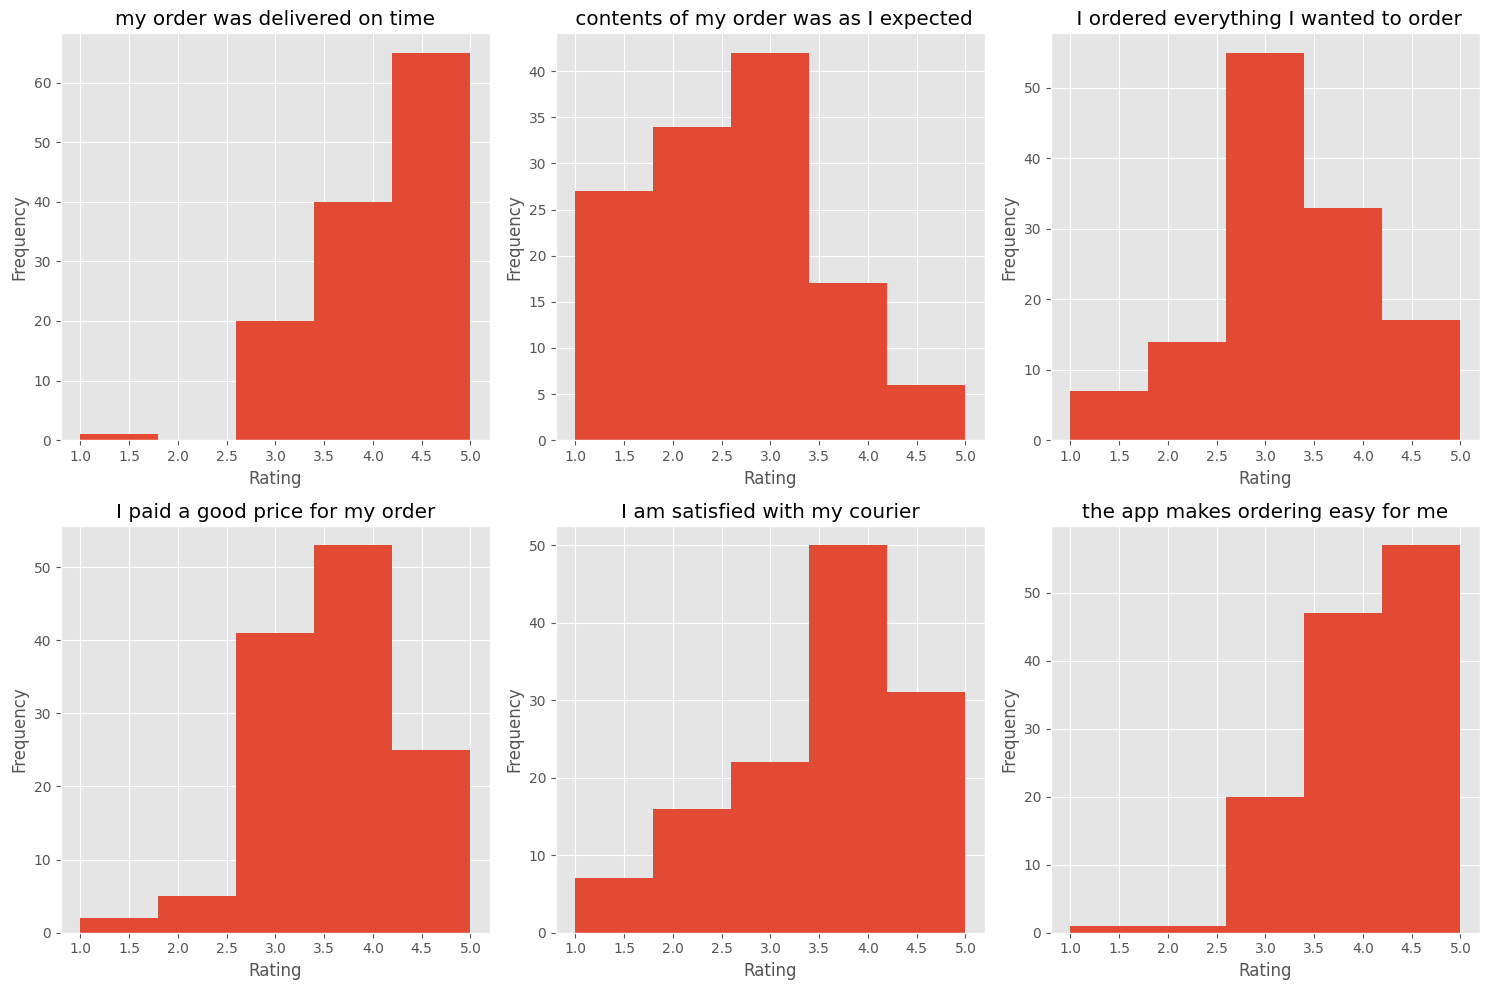

In [ ]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Create a histogram for each feature
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
meaning = ["my order was delivered on time",
           " contents of my order was as I expected",
           " I ordered everything I wanted to order",
           "I paid a good price for my order",
           "I am satisfied with my courier",
           "the app makes ordering easy for me"]
for i, feature in enumerate(features):
    ax = axs[i // 3, i % 3]  # get the current subplot
    df[feature].plot(kind='hist', bins=5, ax=ax)
    ax.set_title(meaning[i])  # set the title to the feature name
    ax.set_xlabel('Rating')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


# Kernel Density Plot (KDE Analysis)

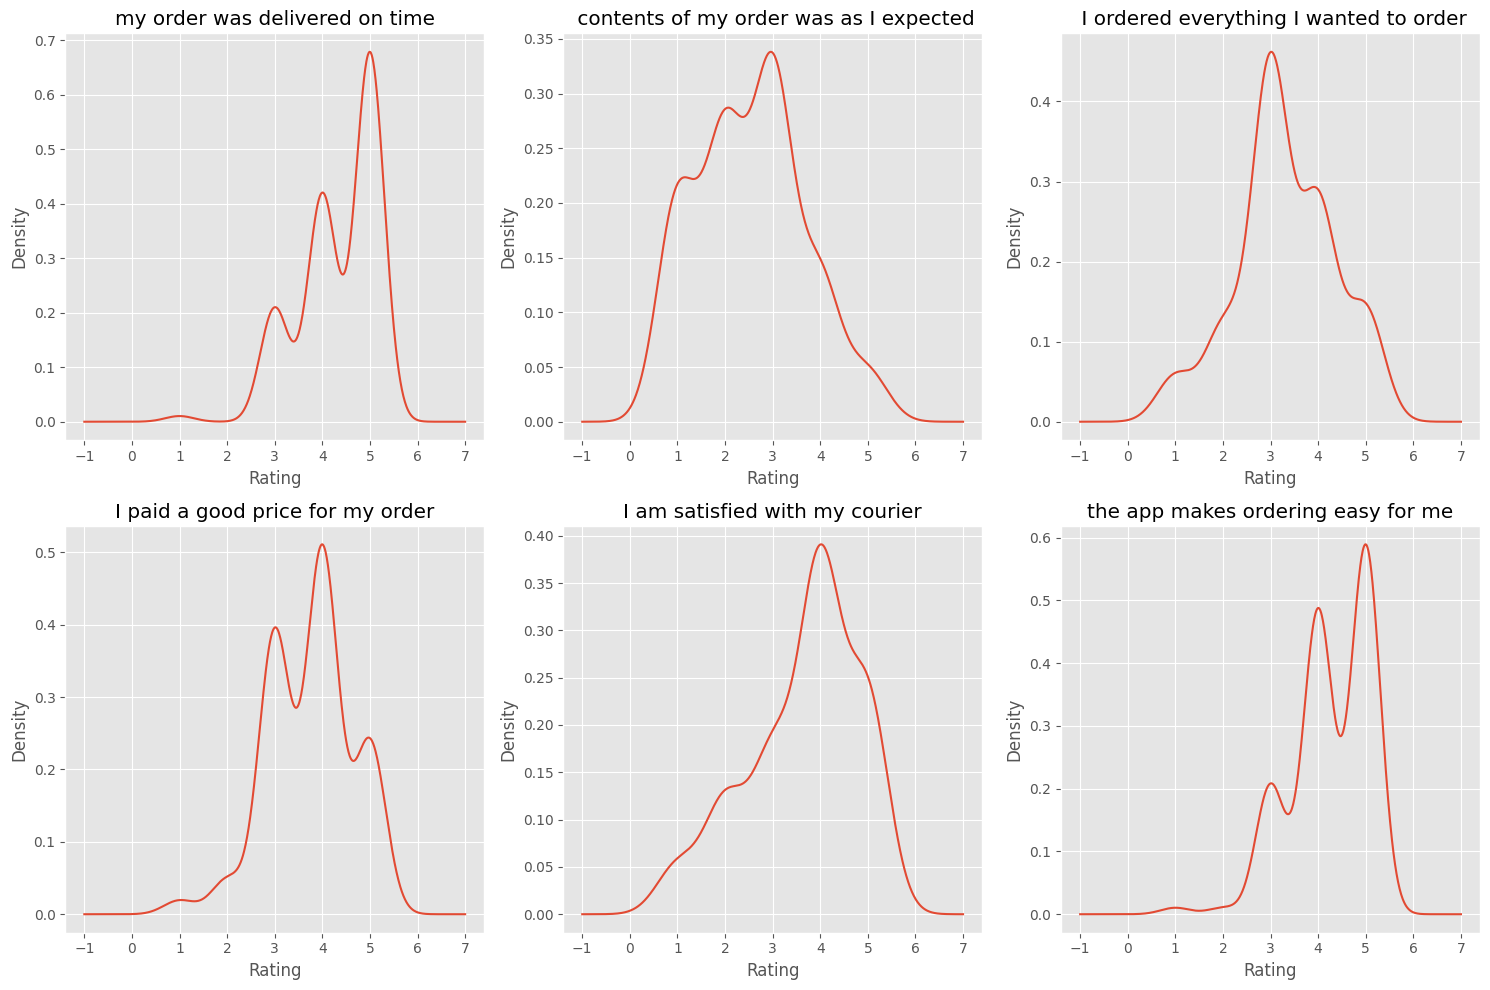

In [ ]:


# Create a figure with a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Create a histogram for each feature
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
meaning = ["my order was delivered on time",
           " contents of my order was as I expected",
           " I ordered everything I wanted to order",
           "I paid a good price for my order",
           "I am satisfied with my courier",
           "the app makes ordering easy for me"]
for i, feature in enumerate(features):
    ax = axs[i // 3, i % 3]  # get the current subplot
    df[feature].plot(kind='kde', ax=ax)
    ax.set_title(meaning[i])  # set the title to the feature name
    ax.set_xlabel('Rating')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


# Percentage Analysis

Results:  {'my order was delivered on time': {'Below 3': 0.7936507936507936, 'Above 3': 99.20634920634922}, ' contents of my order was as I expected': {'Below 3': 48.41269841269841, 'Above 3': 51.587301587301596}, ' I ordered everything I wanted to order': {'Below 3': 16.666666666666664, 'Above 3': 83.33333333333334}, 'I paid a good price for my order': {'Below 3': 5.555555555555555, 'Above 3': 94.44444444444444}, 'I am satisfied with my courier': {'Below 3': 18.253968253968253, 'Above 3': 81.74603174603175}, 'the app makes ordering easy for me': {'Below 3': 1.5873015873015872, 'Above 3': 98.4126984126984}}


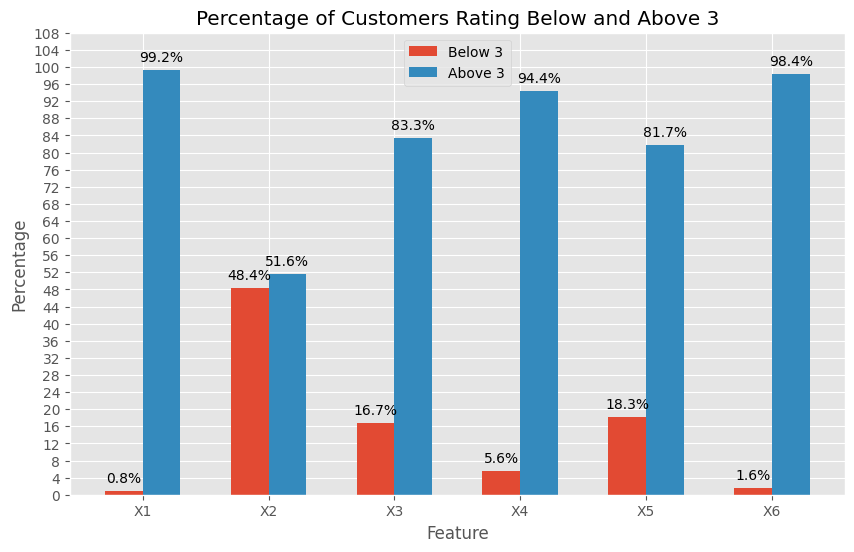

In [ ]:


# Create a dictionary to store the results
results = {}

# Loop through each feature
for feature, mean in zip(features, meaning):
    # Calculate the percentage of customers rating below 3
    below_3 = (df[feature] < 3).sum() / len(df[feature]) * 100
    # Calculate the percentage of customers rating above 3
    above_3 = (df[feature] >= 3).sum() / len(df[feature]) * 100
    # Store the results in the dictionary
    results[mean] = {
        'Below 3': below_3,
        'Above 3': above_3
    }
print("Results: ", results)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot with thin bars and separate bars for each feature
bar_width = 0.3
x = np.arange(len(features))
ax.bar(x - bar_width/2, [values['Below 3']
       for values in results.values()], width=bar_width, label='Below 3')
ax.bar(x + bar_width/2, [values['Above 3']
       for values in results.values()], width=bar_width, label='Above 3')

# Add annotations to show the percentage values
for i, (below, above) in enumerate(zip([values['Below 3'] for values in results.values()], [values['Above 3'] for values in results.values()])):
    ax.text(x[i] - bar_width/2, below + 2, f"{below:.1f}%", ha='center')
    ax.text(x[i] + bar_width/2, above + 2, f"{above:.1f}%", ha='center')

# Set the title and labels
ax.set_title('Percentage of Customers Rating Below and Above 3')
ax.set_xlabel('Feature')
ax.set_ylabel('Percentage')

# Set the xticks to the feature labels
ax.set_xticks(x)
ax.set_xticklabels(features)

# Set the y-axis scale to be more detailed
ax.set_yticks(np.arange(0, 110, 4))
# Add a legend
ax.legend()

# Show the plot
plt.show()


# Observations:

### X1: my order was delivered on time
majority of the data is between 4-5 (good) 
minority have rated 1 

### X2: contents of my order was as I expected
Most people have rated 3 or lower (bad)  
minority have rated 5
### X3: I ordered everything I wanted to order
Most people have rated 3 or above (good) 
minorty have rated below 3
### X4: I paid a good price for my order
Most people have rated 3 or above (good)
minorty have rated below 3

### X5: I am satisfied with my courier
Majority have rated 3.5 or above (good)
### X6: the app makes ordering easy for me
Majority have rated 3 or above (good)
### Conclusion:
1. Majority of the customers are happy with the Courier Service
2. Almost half of the packages are being delivered with incorrect items 
3. Most customers (~ 83 %) have ordered what they wanted to order
4. Almost all customers think pricing for products and service is good (~ 94 %)
5. Most customers are happy with the corier service (~ 82 %)
6. Almost all are happy with the app as it makes ordering easy for them (~ 98.4 %)

# STEP 4:  Feature Relationships

### Scatter Plots (Don't seem viable for this dataset as data does not have enough variation)

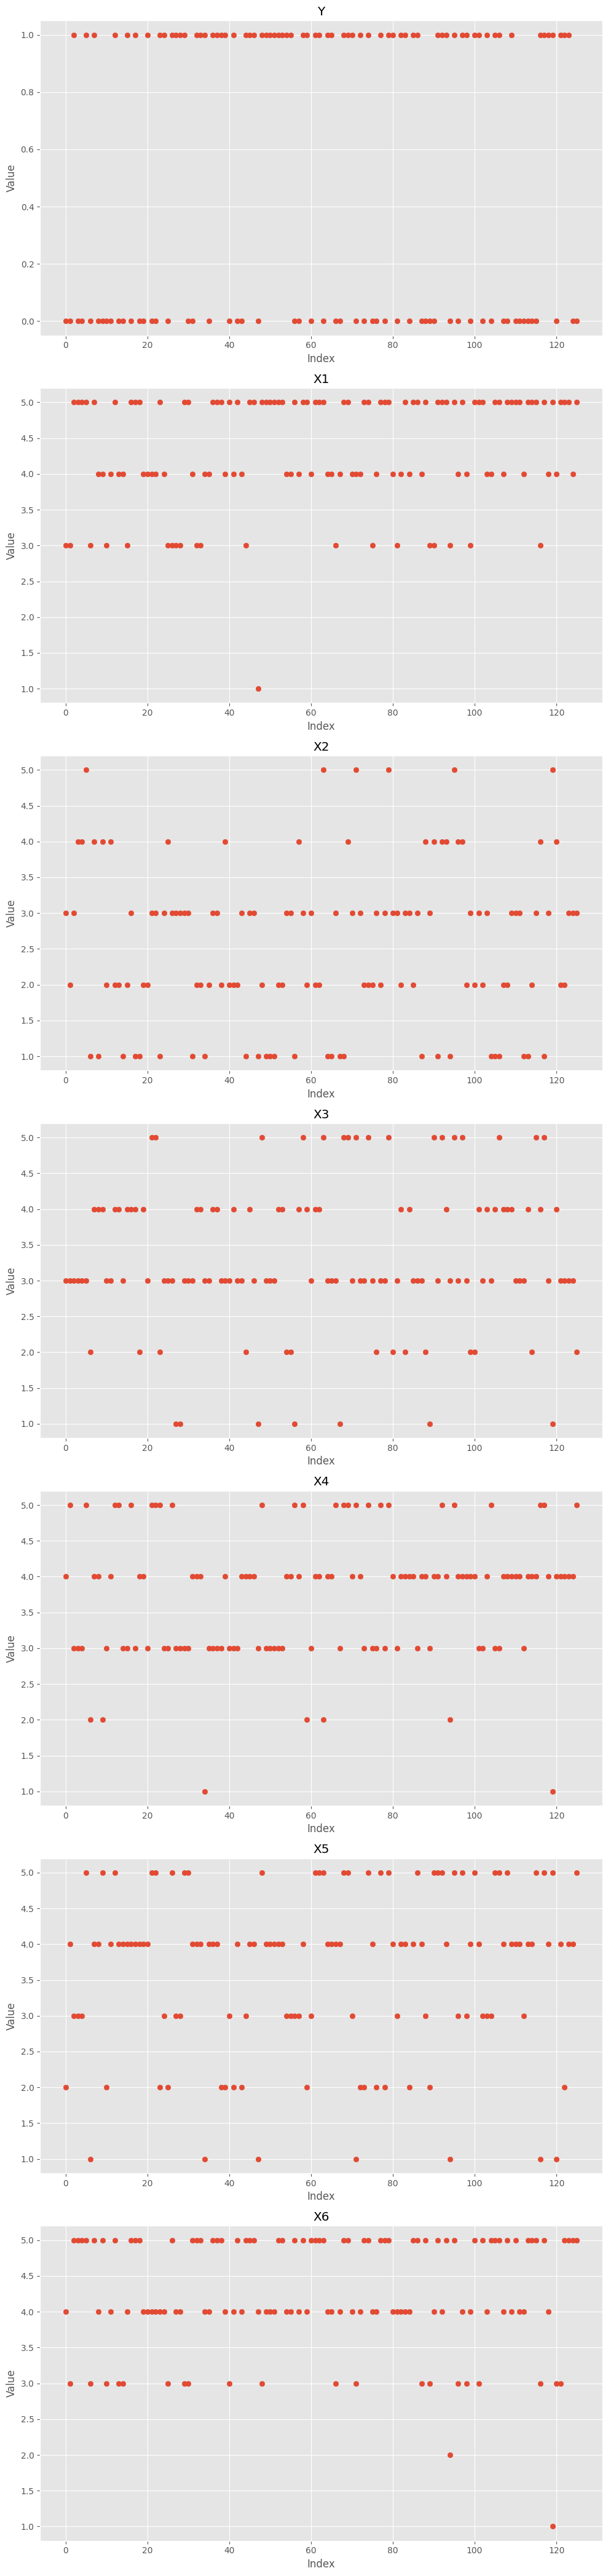

In [ ]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(10, 6*len(df.columns)))

# Loop through each feature
for i, feature in enumerate(df.columns):
    # Create a scatter plot for the feature
    axs[i].scatter(range(len(df)), df[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


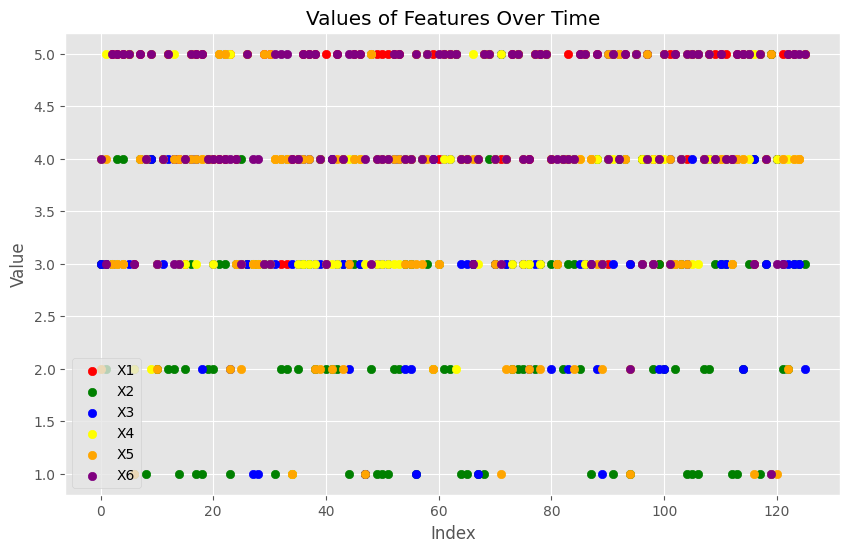

Dataframe:     X1  X2  X3  X4  X5  X6
0   3   3   3   4   2   4
1   3   2   3   5   4   3
2   5   3   3   3   3   5
3   5   4   3   3   3   5
4   5   4   3   3   3   5


In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df1 = df.drop('Y', axis=1, inplace=False)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each feature
colors = ['red', 'green', 'blue', 'yellow',
          'orange', 'purple']  # List of colors
for i, feature in enumerate(df1.columns):
    # Create a scatter plot for the feature
    ax.scatter(range(len(df1)), df1[feature], label=feature, color=colors[i])

# Set the title and labels
ax.set_title('Values of Features Over Time')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()
print("Dataframe: ", df1.head())


# Seaborn SNS Plot

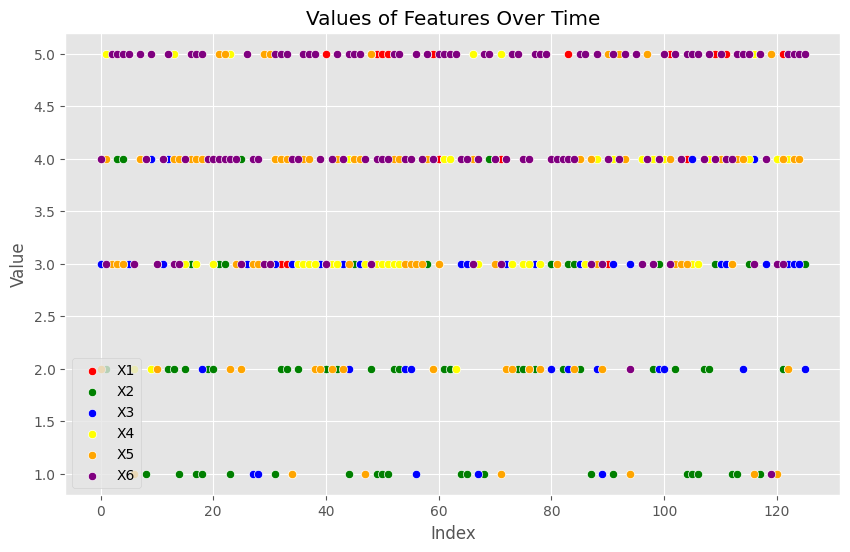

In [9]:
df1 = df.drop('Y', axis=1, inplace=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each feature
colors = ['red', 'green', 'blue', 'yellow',
          'orange', 'purple']  # List of colors
for i, feature in enumerate(df1.columns):
    # Create a scatter plot for the feature
    sns.scatterplot(x=range(len(df1)),
                    y=df1[feature], ax=ax, label=feature, color=colors[i])

# Set the title and labels
ax.set_title('Values of Features Over Time')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()


# SNS Pairplot

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


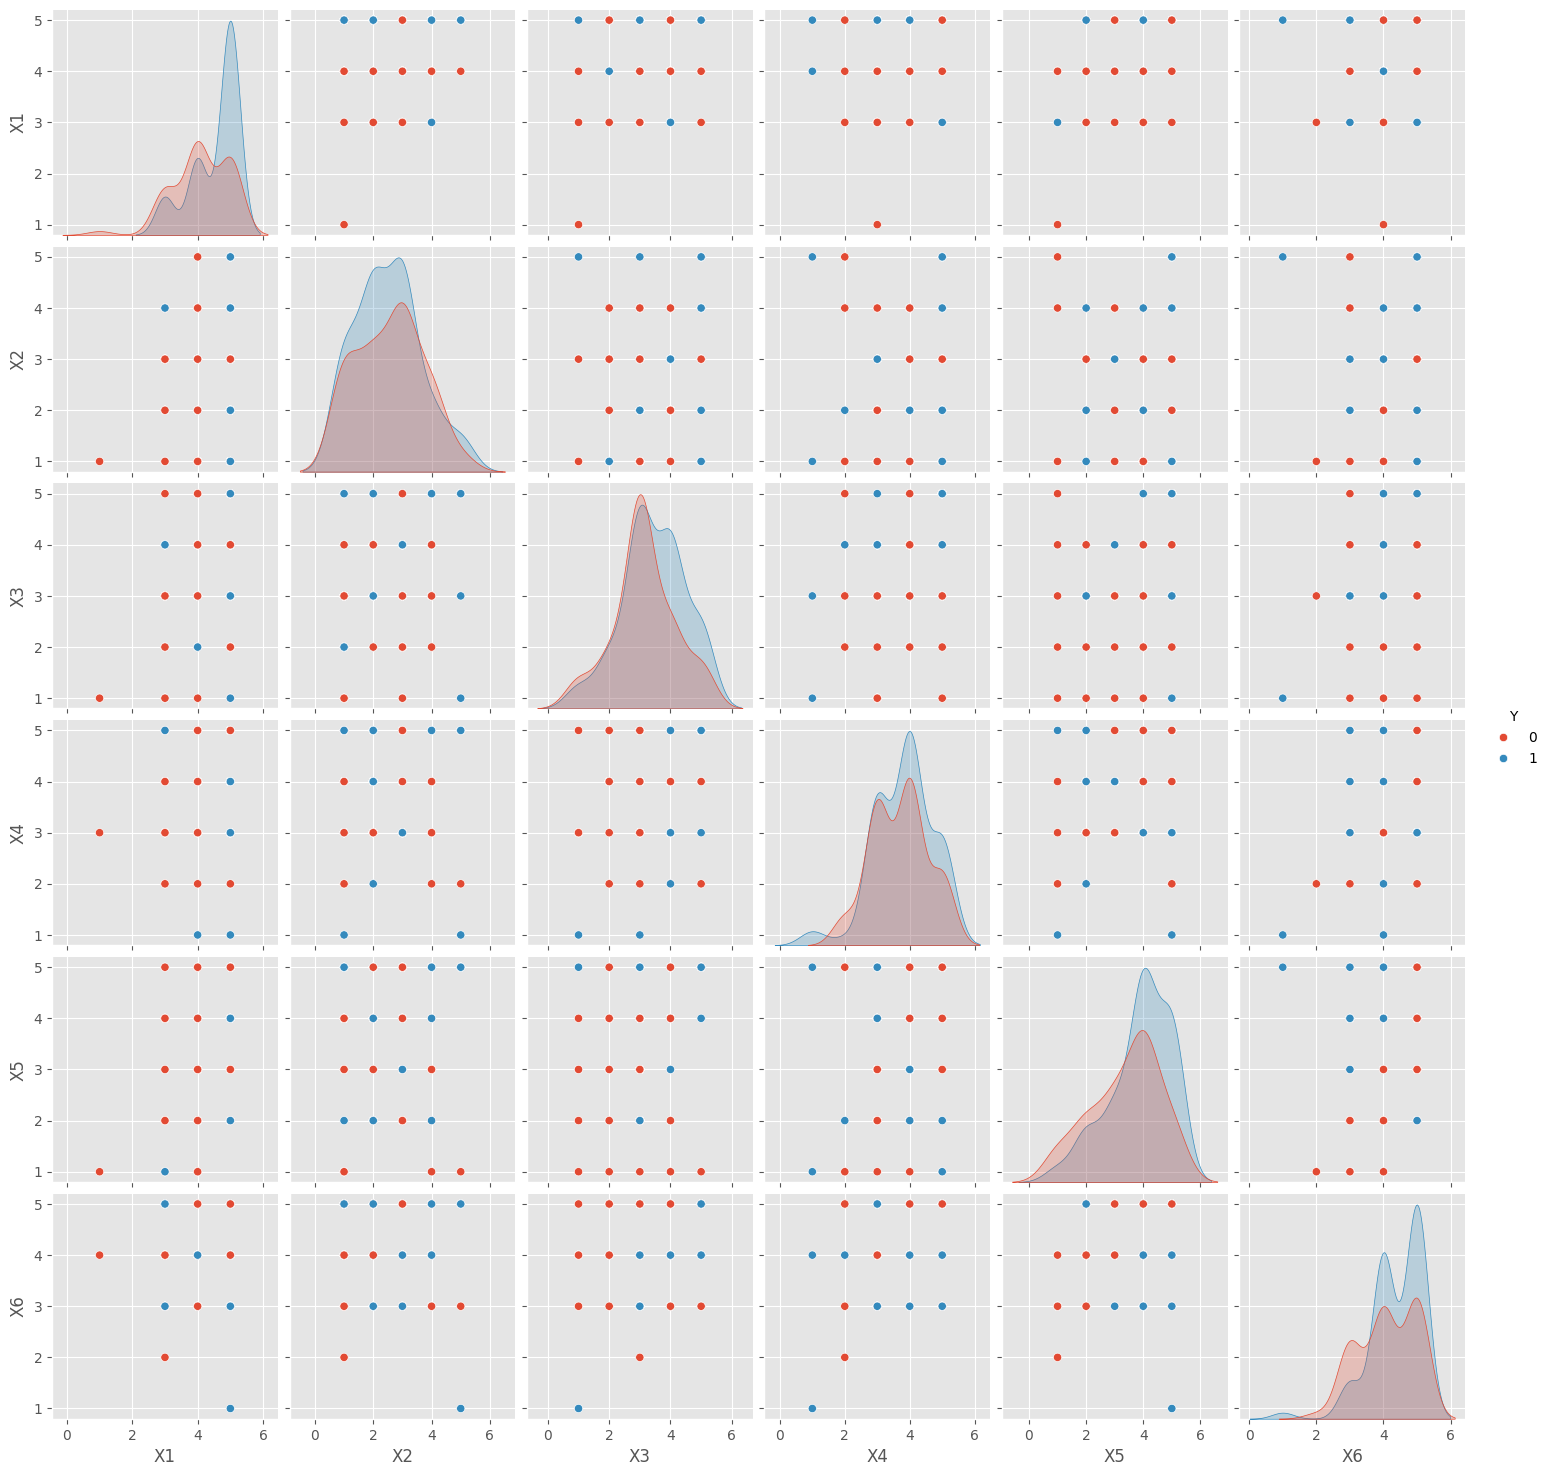

In [10]:
print(df)
sns.pairplot(df, vars=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], hue='Y')

plt.show()


# STEP 5:  Find Correlation in Data

### Correlation Dataframe

In [11]:
df.corr = df[["X1", "X2", "X3", "X4", "X5", "X6", "Y"]].corr()


### SNS Correlation Heatmap

<Axes: >

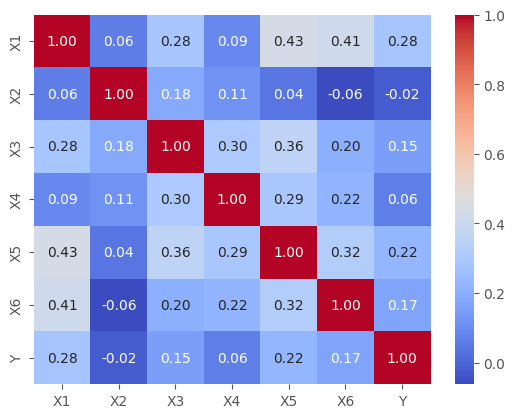

In [12]:
sns.heatmap(df.corr, annot=True, cmap='coolwarm', fmt=".2f")


### Based on above Heatmap we can conclude that:
X1 is the most important feature
X2 is the least important feature 

# Step 6:  Ask Questions about the data

#### 1.What is are the features that impact customer happiness the most  
#### 2. Which features don't really matter 
#### 3. Percentage of happy vs unhappy customers


## Value Counts For Each Feature

In [13]:
# df.head()
print(df[["X1"]].value_counts())
print(df[["X2"]].value_counts())
print(df[["X3"]].value_counts())
print(df[["X4"]].value_counts())
print(df[["X5"]].value_counts())
print(df[["X6"]].value_counts())
print(df[["Y"]].value_counts())


X1
5     65
4     40
3     20
1      1
Name: count, dtype: int64
X2
3     42
2     34
1     27
4     17
5      6
Name: count, dtype: int64
X3
3     55
4     33
5     17
2     14
1      7
Name: count, dtype: int64
X4
4     53
3     41
5     25
2      5
1      2
Name: count, dtype: int64
X5
4     50
5     31
3     22
2     16
1      7
Name: count, dtype: int64
X6
5     57
4     47
3     20
1      1
2      1
Name: count, dtype: int64
Y
1    69
0    57
Name: count, dtype: int64


### Observation:

- X1: Has the highest number of 5 and 4 star ratings
- X2 and X3 have the lowest number of 5 star ratings, which means this is what is making customers unhappy

### Calculate the correlation between each feature and the happiness score


In [14]:
correlations = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].corrwith(df['Y'])

# Sort the correlations in descending order
correlations.sort_values(ascending=True, inplace=False)

# Print the top 3 features that impact customer happiness the most
print(correlations)


X1    0.280160
X2   -0.024274
X3    0.150838
X4    0.064415
X5    0.224522
X6    0.167669
dtype: float64


### Observation:

- X1 and X5 are the most important feature

- X2 is the least important feature and this question should not be asked as its impact is negligible


### Calculate the percentage of happy customers


In [15]:
happy_customers = df[df['Y'] == 1].shape[0] / df.shape[0] * 100

# Calculate the percentage of unhappy customers
unhappy_customers = df[df['Y'] == 0].shape[0] / df.shape[0] * 100

# Print the results
print(f'Happy customers: {happy_customers:.2f}%')
print(f'Unhappy customers: {unhappy_customers:.2f}%')


Happy customers: 54.76%
Unhappy customers: 45.24%


### Observation:
Almost half of teh customers are unhappy, which is a big loss for the business

### Average Rating for each feature

In [16]:
# Calculate the mean rating for each feature
mean_ratings = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].mean()

# Print the mean ratings
print(mean_ratings)


X1    4.333333
X2    2.531746
X3    3.309524
X4    3.746032
X5    3.650794
X6    4.253968
dtype: float64


# Violin Plot

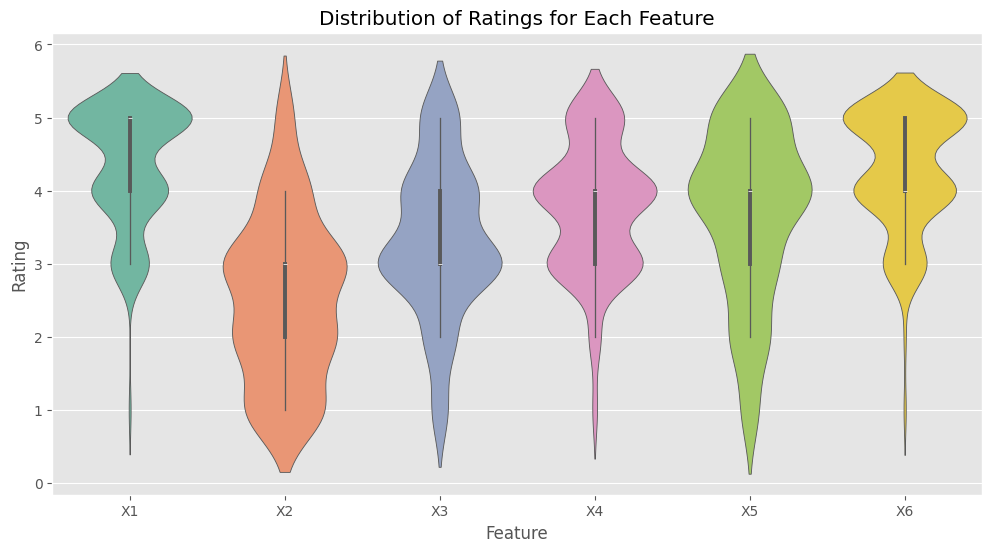

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a violin plot of the ratings for each feature
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], palette="Set2")
plt.title("Distribution of Ratings for Each Feature")
plt.xlabel("Feature")
plt.ylabel("Rating")
plt.show()
